In [176]:
%matplotlib inline
import gym
import numpy as np
import matplotlib.pyplot as plt

# Q-Table Learning


In [178]:
env = gym.make('FrozenLake-v0')
env.metadata

{'render.modes': ['human', 'ansi']}

# Implement Q-Table learning algorithm¶

In [170]:
num_episodes=2000
lr=0.8
R_list=[]
y=0.95


In [93]:
def get_value_table(Q_table):
    val=[np.max(row) for row in Q_table]
    return np.reshape(val,(4,4))

In [172]:
Q=np.zeros((16,4))
for ep_num in range(num_episodes):
    if ep_num%100==0:
        print("Episode number:{0}".format(ep_num))
    R_total=0
    s=env.reset()
    #env.render()
    #print(get_value_table(Q))
    #print("\nStarting training\n")
    d=False
    step=1
    while step<99 and d==False:
        step=step+1
        
        #Determine action
        a=np.argmax((Q[s,:])+ np.random.randn(1,env.action_space.n)*(1./(ep_num+1)))#Noise is added to encourage exploration
        #print("a is {0}".format(a))##Actions are mapped l,d,r,u->0,1,2,3
        
        #Take the action
        s1,r,d,_=env.step(a)
        #env.render()
        #print("s1:{},d:{}".format(s1,d))
        R_total=R_total+r
        
        #Update Q-value at the state
        Q[s,a]=lr*Q[s,a]+ (1-lr)* (1+y*np.argmax(Q[s1,a]))
        s=s1
        
        #print(get_value_table(Q))
    R_list.append(R_total)
    #print((R_list,R_total))

Episode number:0
Episode number:100
Episode number:200
Episode number:300
Episode number:400
Episode number:500
Episode number:600
Episode number:700
Episode number:800
Episode number:900
Episode number:1000
Episode number:1100
Episode number:1200
Episode number:1300
Episode number:1400
Episode number:1500
Episode number:1600
Episode number:1700
Episode number:1800
Episode number:1900


In [173]:
print "Score over time: " +  str(sum(R_list)/num_episodes)

Score over time: 0.0175


# Plot 

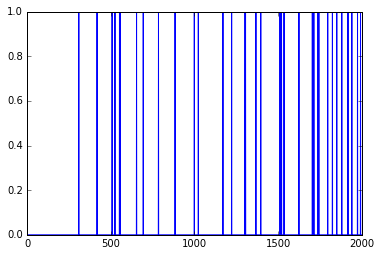

In [177]:
plt.plot(R_list)
